In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_samples

df = pd.read_csv("Mall_Customers.csv")

In [45]:
print(df.describe(include='all'))
print(df['Gender'].value_counts())

        CustomerID  Gender         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.500000   
50%     100.500000     NaN   36.000000           61.500000   
75%     150.250000     NaN   49.000000           78.000000   
max     200.000000     NaN   70.000000          137.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
min                   1.

In [47]:
df.rename(columns={
    "Annual Income (k$)": "Ingresos anual",
    "Spending Score (1-100)": "Puntaje de gasto"
}, inplace=True)

In [49]:
print(df.columns.tolist())


['CustomerID', 'Gender', 'Age', 'Ingresos anual', 'Puntaje de gasto']


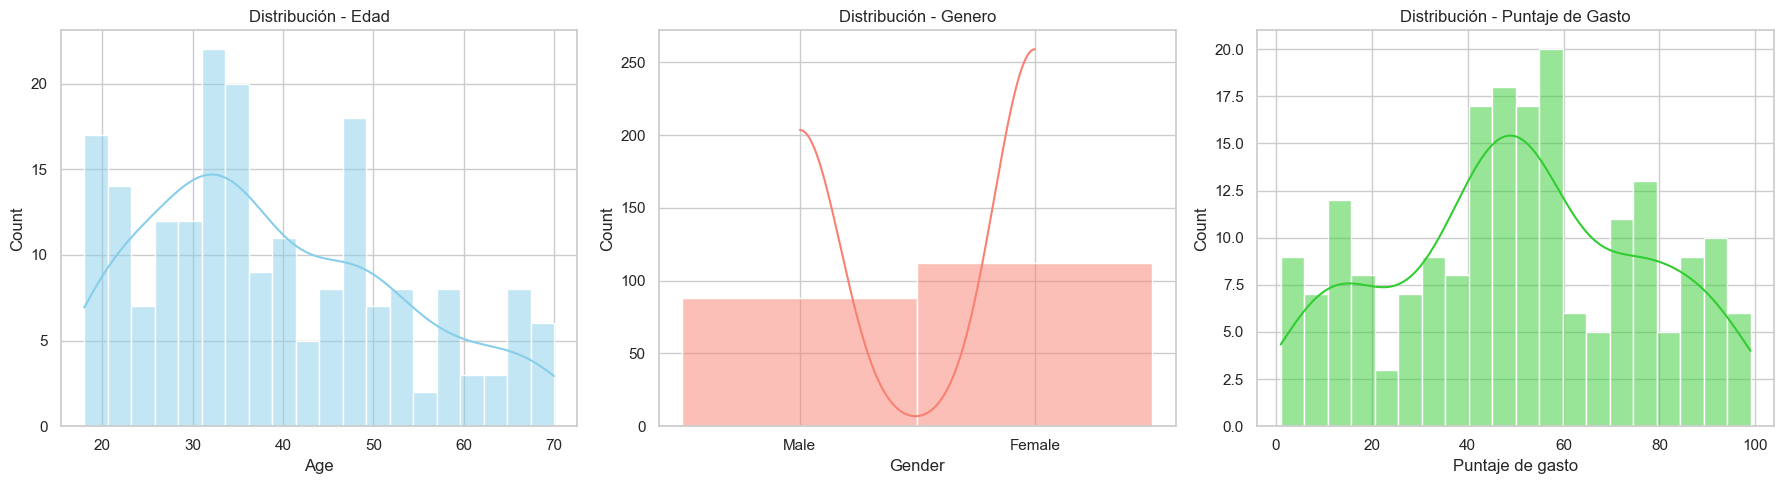

In [51]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], kde=True, bins=20, ax=axs[0], color='skyblue')
axs[0].set_title('Distribución - Edad')

sns.histplot(df['Gender'], kde=True, bins=20, ax=axs[1], color='salmon')
axs[1].set_title('Distribución - Genero')

sns.histplot(df['Puntaje de gasto'], kde=True, bins=20, ax=axs[2], color='limegreen')
axs[2].set_title('Distribución - Puntaje de Gasto')

plt.tight_layout()
plt.show()

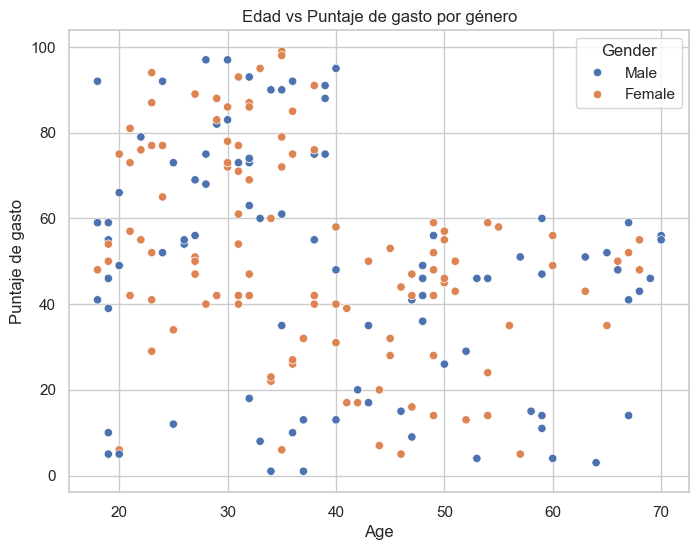

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Puntaje de gasto', hue='Gender')
plt.title('Edad vs Puntaje de gasto por género')
plt.show()

In [55]:
df.isnull().sum()

CustomerID          0
Gender              0
Age                 0
Ingresos anual      0
Puntaje de gasto    0
dtype: int64

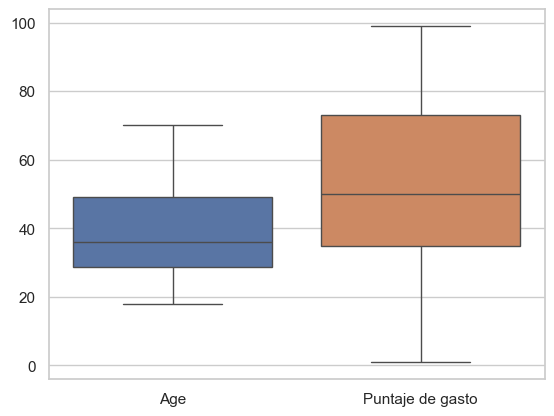

In [57]:
df.describe()

sns.boxplot(data=df[['Age', 'Puntaje de gasto']])
plt.show()

In [59]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [61]:
scaler = StandardScaler()
df_scaled = df[['Ingresos anual', 'Puntaje de gasto']]
df_scaled = scaler.fit_transform(df_scaled)

In [63]:
df.drop("CustomerID", axis=1, inplace=True)

In [65]:
features = ['Gender', 'Age', 'Ingresos anual', 'Puntaje de gasto']

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [71]:
corr = df[features].corr()

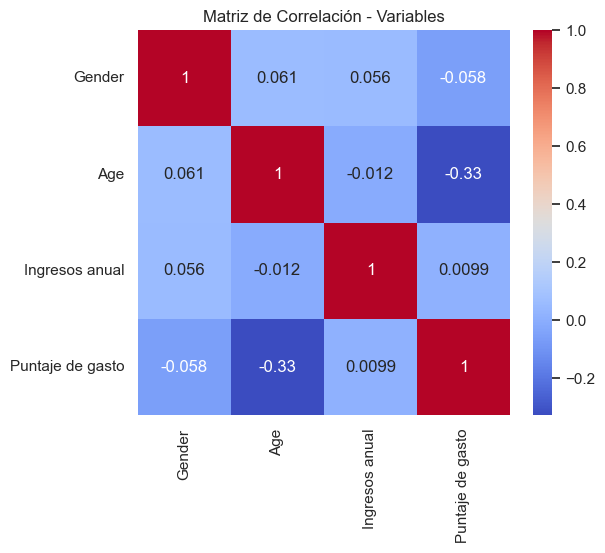

In [73]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Variables')
plt.show()

In [75]:
sel = VarianceThreshold(threshold=0.5)
X_selected_scaled = sel.fit_transform(X_scaled)

mask = sel.get_support()
selected_features = [f for f, m in zip(features, mask) if m]
print("Variables seleccionadas según varianza:", selected_features)

Variables seleccionadas según varianza: ['Gender', 'Age', 'Ingresos anual', 'Puntaje de gasto']


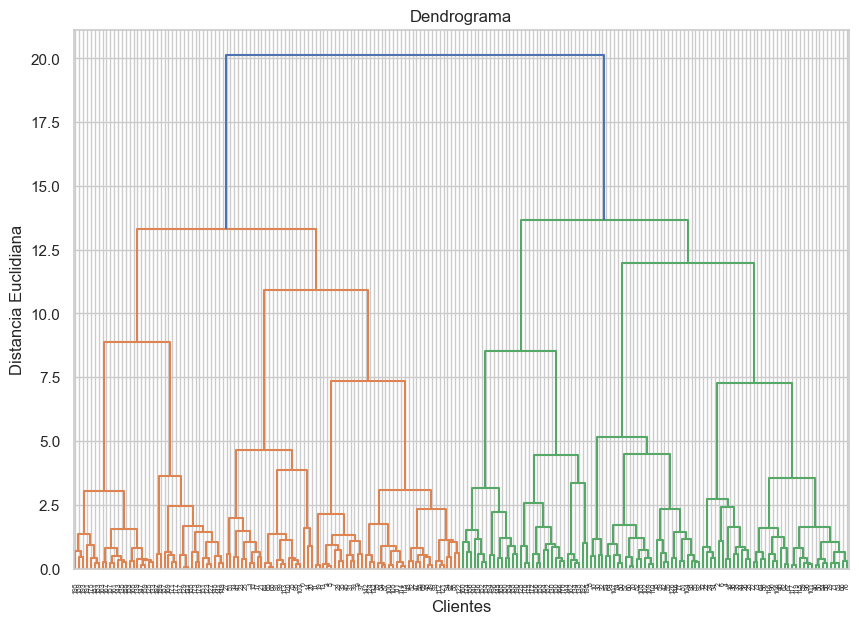

In [77]:
plt.figure(figsize=(10, 7))
dendrograma = sch.dendrogram(sch.linkage(X_selected_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [81]:
modelo_hc = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
labels_hc = modelo_hc.fit_predict(X_selected_scaled)

print("Etiquetas de los clusters:", labels_hc)

Etiquetas de los clusters: [2 2 9 8 9 8 9 8 0 8 0 8 9 8 2 2 9 2 0 8 2 2 9 2 9 2 9 2 9 8 0 8 0 2 9 8 9
 8 9 8 3 2 0 4 9 8 3 4 4 4 3 2 4 0 3 0 3 0 4 0 0 2 3 3 0 2 3 3 2 4 0 3 3 3
 0 2 3 0 4 3 0 0 0 3 4 0 3 4 4 3 3 2 0 4 4 2 3 4 0 2 4 3 0 2 0 4 3 0 0 0 0
 4 4 2 4 4 3 3 3 3 2 4 4 5 4 6 0 5 1 5 1 5 4 6 1 6 7 5 1 6 7 5 4 6 1 5 0 6
 7 5 1 5 7 6 7 6 1 6 1 6 7 6 1 6 1 6 1 6 7 5 1 5 1 5 7 6 1 5 1 5 7 6 1 6 7
 5 7 5 7 6 7 6 1 6 7 6 7 5 1 5]


In [85]:
silhouette_hc = silhouette_score(X_selected_scaled, labels_hc)
calinski_hc = calinski_harabasz_score(X_selected_scaled, labels_hc)

print(f"Coeficiente de Silhouette: {silhouette_hc:.4f}")
print(f"Índice de Calinski-Harabasz: {calinski_hc:.4f}")

Coeficiente de Silhouette: 0.4176
Índice de Calinski-Harabasz: 87.6113


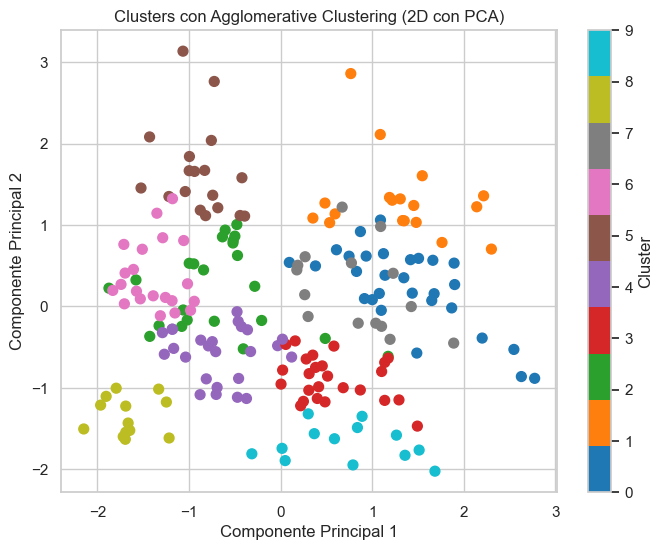

In [89]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hc, cmap='tab10', s=50)
plt.title("Clusters con Agglomerative Clustering (2D con PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

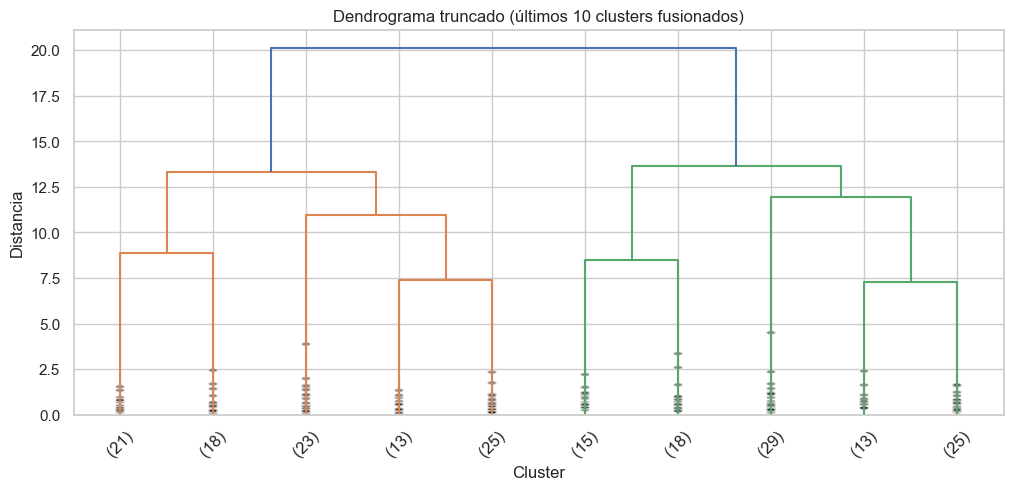

In [93]:
linked = linkage(X_selected_scaled, method='ward')

plt.figure(figsize=(12, 5))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title("Dendrograma truncado (últimos 10 clusters fusionados)")
plt.xlabel("Cluster")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

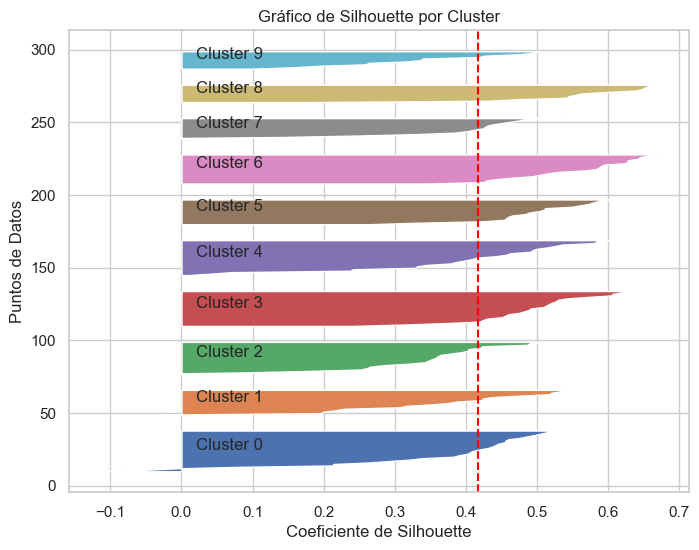

In [101]:
silhouette_vals = silhouette_samples(X_selected_scaled, labels_hc)

plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(10):
    cluster_silhouette_vals = silhouette_vals[labels_hc == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(0.02, y_lower + 0.5 * size_cluster, f'Cluster {i}')
    y_lower = y_upper + 10

plt.axvline(x=silhouette_score(X_selected_scaled, labels_hc), color="red", linestyle="--")
plt.title("Gráfico de Silhouette por Cluster")
plt.xlabel("Coeficiente de Silhouette")
plt.ylabel("Puntos de Datos")
plt.grid(True)
plt.show()